In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 8]

In [79]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(20))

    age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63    1   1       145  233    1        2      150      0      2.3      3   
1    67    1   4       160  286    0        0      108      1      1.5      2   
2    67    1   4       120    ?    0        2      129      1      2.6      2   
3    37    1   3       130  250    0        0      187      0      3.5      3   
4    41    0   2       130  204    0        2      172      0      1.4      1   
5    56    1   2       120  236    0        0      178      0      0.8      1   
6    62    0   4       140  268    0        2      160      0      3.6      3   
7    57    0   4       120  354    0        0      163      1      0.6      1   
8    63    1   4       130  254    0        2      147      0      1.4      2   
9    53    1   4       140  203    1        2      155      1      3.1      3   
10   57    1   4       140  192    0        0      148      0      0.4      2   
11   56    0   2       140  

In [80]:
print(raw_data.describe().T)

              count        mean        std   min    25%    50%    75%    max
age           303.0   54.438944   9.038662  29.0   48.0   56.0   61.0   77.0
sex           303.0    0.679868   0.467299   0.0    0.0    1.0    1.0    1.0
cp            303.0    3.158416   0.960126   1.0    3.0    3.0    4.0    4.0
treshbps      303.0  131.689769  17.599748  94.0  120.0  130.0  140.0  200.0
fbs           303.0    0.148515   0.356198   0.0    0.0    0.0    0.0    1.0
restecg       303.0    0.983498   0.994883   0.0    0.0    0.0    2.0    2.0
thalach       303.0  149.607261  22.875003  71.0  133.5  153.0  166.0  202.0
exang         303.0    0.326733   0.469794   0.0    0.0    0.0    1.0    1.0
oldpeak       303.0    1.039604   1.161075   0.0    0.0    0.8    1.6    6.2
slope         303.0    1.600660   0.616226   1.0    1.0    2.0    2.0    3.0
HeartDisease  303.0    0.458746   0.499120   0.0    0.0    0.0    1.0    1.0


In [81]:
raw_data

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [82]:
clean_data = raw_data.replace('?', np.nan)  # '?'을 NaN으로 대체해주고
clean_data = clean_data.dropna()  # 버리자
print(clean_data.info())          # 7개 정도는 쳐내도 된다..

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


In [83]:
keep = column_name.pop()
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [84]:
training_data = clean_data[column_name]
target = clean_data[[keep]]
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1       145  233.0    1        2      150      0      2.3   
1   67    1   4       160  286.0    0        0      108      1      1.5   
3   37    1   3       130  250.0    0        0      187      0      3.5   
4   41    0   2       130  204.0    0        2      172      0      1.4   
5   56    1   2       120  236.0    0        0      178      0      0.8   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
3      3  0.0   3.0  
4      1  0.0   3.0  
5      1  0.0   3.0  
   HeartDisease
0             0
1             1
3             0
4             0
5             0


In [85]:
print(target[keep].sum())
print(target.sum())

136
HeartDisease    136
dtype: int64


In [86]:
raw_data
# 위 데이터에서 cp의 1-4는 수치로 의미있는 값이 아니라 분류로 의미있는 값이라서?
# cp를 컬럼 4개로 쪼개서 이진으로 분류? ex. cp1에 0 1 0 0 1 이런 식으로..

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)  # 스케일링을 하면 배열이 된다고?
print(type(scaled_data))  # 그러네요.. 그래서 다시 데이터프레임으로 만들어줘야된대

scaled_data = pd.DataFrame(scaled_data, columns=column_name)
scaled_data.head()

<class 'numpy.ndarray'>


,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.942285,0.692820,-2.236793,0.747441,-0.277228,2.425638,1.020526,0.014451,-0.692820,1.074839,2.264087,-0.718421,0.660262
1,1.385714,0.692820,0.876486,1.592523,0.742265,-0.412263,-0.993312,-1.818794,1.443376,0.386756,0.645320,2.487397,-0.890830
2,-1.939999,0.692820,-0.161274,-0.097641,0.049779,-0.412263,-0.993312,1.629453,-0.692820,2.106963,2.264087,-0.718421,-0.890830
3,-1.496571,-1.443376,-1.199033,-0.097641,-0.835064,-0.412263,1.020526,0.974723,-0.692820,0.300746,-0.973448,-0.718421,-0.890830
4,0.166286,0.692820,-1.199033,-0.661029,-0.219521,-0.412263,-0.993312,1.236615,-0.692820,-0.215316,-0.973448,-0.718421,-0.890830


In [88]:
scaled_data.describe().T
# print(scaled_data.describe().T) 해야되는데 보기 불편해서 걍 print 뺌
# ㅋㅋㅋ mean 저정도 -18승 이면 0이라고 하래..

,count,mean,std,min,25%,50%,75%,max
age,296.0,4.500904e-18,1.001693,-2.826856,-0.720571,0.166286,0.720571,2.494285
sex,296.0,2.850573e-17,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.200241e-16,1.001693,-2.236793,-0.161274,-0.161274,0.876486,0.876486
treshbps,296.0,6.067781e-16,1.001693,-2.125838,-0.661029,-0.097641,0.465747,3.846075
chol,296.0,1.997276e-17,1.001693,-2.335451,-0.700414,-0.084871,0.554717,6.089796
fbs,296.0,7.501507e-19,1.001693,-0.412263,-0.412263,-0.412263,-0.412263,2.425638
restecg,296.0,2.182939e-16,1.001693,-0.993312,-0.993312,-0.489853,1.020526,1.020526
thalach,296.0,6.458797e-16,1.001693,-3.433796,-0.694840,0.145397,0.712830,2.284183
exang,296.0,5.926190e-17,1.001693,-0.692820,-0.692820,-0.692820,1.443376,1.443376
oldpeak,296.0,-7.951597e-17,1.001693,-0.903399,-0.903399,-0.215316,0.472766,4.429243


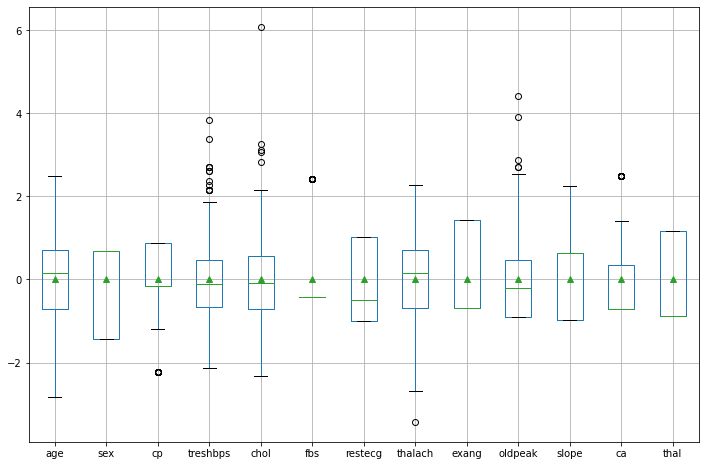

In [89]:
scaled_data.boxplot(column=column_name,
                    showmeans=True,
                    figsize=(12, 8))  # showmeans=True로 평균 보여주기 초록삼각형
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size=0.30)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('Y_train :', Y_train.shape)
print('Y_test :', Y_test.shape)

X_train : (207, 13)
X_test : (89, 13)
Y_train : (207, 1)
Y_test : (89, 1)


In [91]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))  # 이거 딤 머라고 햇었ㄷ
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               7168      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 171,521
Trainable params: 171,521
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train,
                     batch_size=50, epochs=10,
                     validation_split=0.2, verbose=1)

Epoch 1/10
4/4 [==============================] - 0s 24ms/step - loss: 0.2196 - binary_accuracy: 0.6545 - val_loss: 0.1257 - val_binary_accuracy: 0.9048
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1361 - binary_accuracy: 0.8364 - val_loss: 0.0687 - val_binary_accuracy: 0.9286
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1035 - binary_accuracy: 0.8727 - val_loss: 0.0537 - val_binary_accuracy: 0.9524
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0922 - binary_accuracy: 0.8909 - val_loss: 0.0477 - val_binary_accuracy: 0.9286
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0826 - binary_accuracy: 0.8970 - val_loss: 0.0477 - val_binary_accuracy: 0.9286
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0741 - binary_accuracy: 0.9030 - val_loss: 0.0504 - val_binary_accuracy: 0.9286
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0690 - binary_a

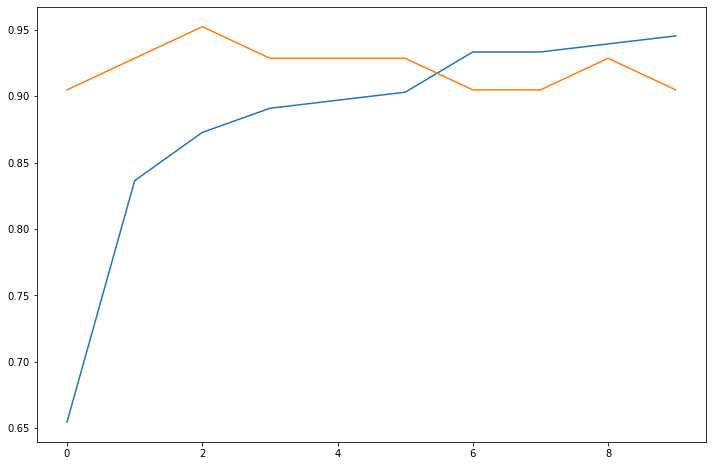

In [93]:
plt.plot(fit_hist.history['binary_accuracy'])
# 학습정확도가 이후 점점 1에 근접하는 건 걍 답을 외운 거임.. 과적합..ㅋㅋ
plt.plot(fit_hist.history['val_binary_accuracy'])
# 검증정확도 : 공부하라고 준 문제집 말고 실제 문제 풀라고 출제한 건.. 좀 모자라죠..
plt.show()

In [94]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.17132002115249634
Keras DNN model accuracy : 0.7415730357170105
